In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data (전체).csv')

def parse_time(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['time'] = df['time'].apply(parse_time)

In [ ]:
df

,date,time,entire_num,center_num,bottom_num,right_num
0,2023-05-12,39703,2,1,0,0
1,2023-05-12,39704,2,1,0,0
2,2023-05-12,39705,2,1,0,0
3,2023-05-12,39706,2,1,0,0
4,2023-05-12,39707,2,1,0,0
...,...,...,...,...,...,...
23216,2023-05-19,63341,7,0,6,1
23217,2023-05-19,63342,7,0,6,1
23218,2023-05-19,63343,6,0,6,0
23219,2023-05-19,63344,7,0,7,0


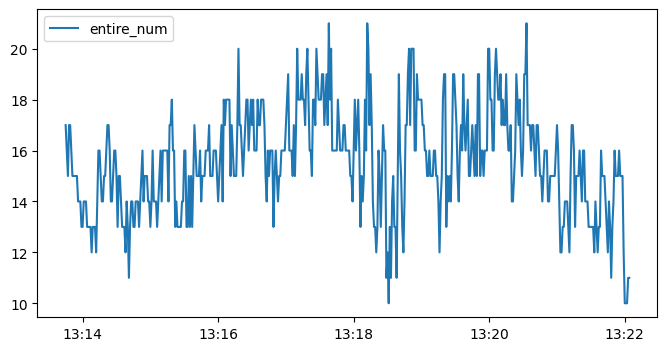

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MinuteLocator
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,4

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()

# y축의 값을 정수로 표현하도록 설정
#set_major_locator : 주 눈금의 위치를 조정
#MaxNLocator : 눈금의 최대 개수 제한, 정수 위치에만 표시
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 datetime 형태로 변환
x_values_seconds = np.array(df.time[start_index:end_index])
x_values_time = [timedelta(seconds=int(s)) for s in x_values_seconds]

x_values_datetime = [datetime(1900, 1, 1) + t for t in x_values_time]

#[13:13:45, 13:13:46, 13:13:47 ...]

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)

plt.plot(x_values_datetime, df['entire_num'].values[start_index:end_index], label='entire_num')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from scipy.ndimage import gaussian_filter1d

sigma = 10  #6, 10
smoothed = gaussian_filter1d(df['entire_num'], sigma)  # Window size 5, polynomial order 3
df['entire_num_MA_Smooth'] = smoothed

In [ ]:
print(df)

             date   time  entire_num  center_num  bottom_num  right_num  \
0      2023-05-12  39703           2           1           0          0   
1      2023-05-12  39704           2           1           0          0   
2      2023-05-12  39705           2           1           0          0   
3      2023-05-12  39706           2           1           0          0   
4      2023-05-12  39707           2           1           0          0   
...           ...    ...         ...         ...         ...        ...   
23216  2023-05-19  63341           7           0           6          1   
23217  2023-05-19  63342           7           0           6          1   
23218  2023-05-19  63343           6           0           6          0   
23219  2023-05-19  63344           7           0           7          0   
23220  2023-05-19  63345           7           0           7          0   

       entire_num_MA_Smooth  
0                         2  
1                         2  
2        

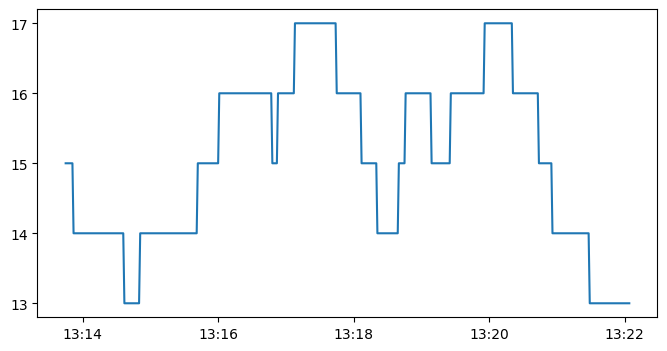

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()



# y축의 값을 정수로 표현하도록 설정
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 3600으로 나눈 값으로 표현하도록 설정
x_values = np.array(df.time[start_index:end_index]) / 3600

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)



# x_values를 분 단위로 변환
x_values_minutes = x_values * 60

# x축에 분:초 형식으로 표시
formatter = DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(formatter)

plt.plot(x_values_datetime, df['entire_num_MA_Smooth'].values[start_index:end_index])
plt.show()

In [ ]:
count = 0

for i in range(len(df)-2):
  diff1 = df['entire_num_MA_Smooth'][i+1] - df['entire_num_MA_Smooth'][i]
  diff2 = df['entire_num_MA_Smooth'][i+2] - df['entire_num_MA_Smooth'][i+1]

  if abs(diff1) >=1 and abs(diff2) >=1:
    count +=1

print(count)

0


In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import MeanSquaredLogarithmicError

#차트의 기본 크기를 설정합니다.
rcParams['figure.figsize'] = 8,4 #그림(figure)의 크기. (가로,세로) 인치 단위

data = df

#creating dataframe

new_data = data[['entire_num_MA_Smooth', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data = data[['time', 'entire_num', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data['time'] = new_data['time'].apply(parse_time)

print(new_data)


       entire_num_MA_Smooth  center_num  bottom_num  right_num
0                         2           1           0          0
1                         2           1           0          0
2                         2           1           0          0
3                         2           1           0          0
4                         2           1           0          0
...                     ...         ...         ...        ...
23216                     6           0           6          1
23217                     6           0           6          1
23218                     6           0           6          0
23219                     6           0           7          0
23220                     6           0           7          0

[23221 rows x 4 columns]


In [ ]:
def letsPredict(iteration=0, loss_function = MeanSquaredLogarithmicError(), epochs = 3, batch_size = 10, time_window = 200, prediction_time = 1200):
  global SLE_df,valid, dataset

  #create and fit the Seq2Seq model
  model = Seq2SeqModel(units = 100, time_window = time_window)
  model.compile(loss = loss_function, optimizer='adam')

  model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose=1) #epdochs =3 , batch_size = 10


  # 'Predictions' 열이 이미 있으면 제외하고 스케일링
  if 'Predictions' in valid.columns:
      valid = valid.drop(columns=['Predictions'])

  print("valid.shape : ", valid.shape)

  dataset = dataset[len(train)-time_window:, :]

  valid = pd.concat([dataset, valid], axis=0)

  print("valid.shape : ", valid.shape)

  scaled_inputs = scaler.transform(valid)

  inputs = pd.DataFrame(scaled_inputs, columns=new_data.columns)

  X_test = []
  for i in range(time_window,len(inputs)-prediction_time):
      X_test.append(inputs.iloc[i-time_window:i+1, :])


  X_test = np.array(X_test)
  X_test = X_test.reshape(-1, time_window + 1, X_test.shape[2])

  predicted_values = model.predict(X_test)
  predicted_values = scaler_y.inverse_transform(predicted_values)
  predicted_values[predicted_values < 0] = 0

  x_data = dataset['time'][:len(train)]
  y_data = dataset['entire_num_MA_Smooth'][:len(train)]

  # 그래프 생성
  fig, ax = plt.subplots()
  line, = ax.plot(x_data, y_data)

  dataset['time'][len(train):len(train)+len(predicted_values)] += prediction_time

  ani = animation.FuncAnimation(fig, update, frames=dataset['time'][len(train):len(train)+len(predicted_values)], interval=100, blit=False)

  return predicted_values

In [ ]:
class Seq2SeqModel(tf.keras.Model):
  def __init__(self, units, time_window, **kwargs):
    super(Seq2SeqModel, self).__init__(**kwargs)
    self.units = units
    self.time_window = time_window
    self.encoder = layers.LSTM(units = self.units, return_sequences = True)
    self.decoder = layers.LSTM(units = self.units, return_sequences = False)
    self.output_layer = layers.Dense(1)

  def call(self, inputs):
    encoder_outputs = self.encoder(inputs)
    decoder_outputs = self.decoder(encoder_outputs[:, -self.time_window:, :])
    output = self.output_layer(decoder_outputs)
    return output

16/16 [==============================] - 5s 99ms/step - loss: 0.0307
scaled_inputs :  [[0.27777778 0.         0.25       0.1       ]
 [0.27777778 0.11111111 0.25       0.        ]
 [0.27777778 0.22222222 0.25       0.        ]
 ...
 [0.33333333 0.         0.75       0.        ]
 [0.33333333 0.         0.875      0.        ]
 [0.33333333 0.         0.875      0.        ]]
inputs :        entire_num_MA_Smooth  center_num  bottom_num  right_num
0                 0.277778    0.000000       0.250        0.1
1                 0.277778    0.111111       0.250        0.0
2                 0.277778    0.222222       0.250        0.0
3                 0.277778    0.111111       0.250        0.0
4                 0.222222    0.000000       0.250        0.0
...                    ...         ...         ...        ...
7936              0.333333    0.000000       0.750        0.1
7937              0.333333    0.000000       0.750        0.1
7938              0.333333    0.000000       0.750        

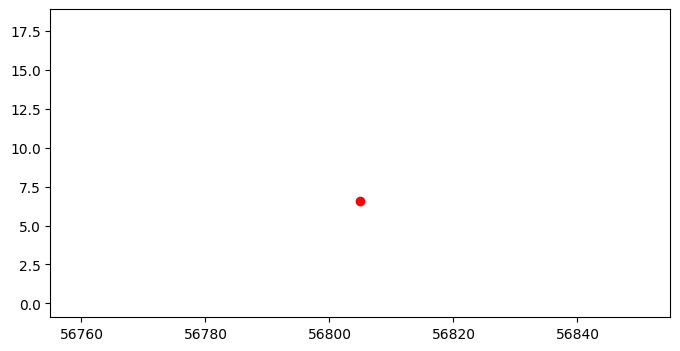

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML


#time열 제거 minmaxscaler사용x 이후 다시 합친다.

dataset = new_data.values

train_len = (len(dataset)*2)//3

train = dataset[0:train_len,:]
train = pd.DataFrame(train, columns = new_data.columns)
valid = dataset[train_len:,:]
valid = pd.DataFrame(valid, columns = new_data.columns)

#값을 0 ~ 1 사이의 값으로 변환 합니다
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train)

scaled_data = pd.DataFrame(scaled_data, columns = new_data.columns)

time_window = 200
prediction_time =1200


x_train, y_train = [], []
for i in range(time_window,len(train)):
    x_train.append(scaled_data.iloc[i-time_window:i+1,0:4])
    y_train.append(new_data.iloc[i+prediction_time,0])

y_train = np.array(y_train).reshape(-1,1)

scaler_y = MinMaxScaler(feature_range = (0,1))
scaled_y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

y_train = scaled_y_train

# x_train [0:time_window]=>0:59까지데이터 y_train [time_window]
x_train, y_train = np.array(x_train), np.array(y_train)


# SLE 값을 저장할 빈 DataFrame 초기화
SLE_df = pd.DataFrame()




#create and fit the Seq2Seq model
model = Seq2SeqModel(units = 100, time_window = time_window)
model.compile(loss = MeanSquaredLogarithmicError(), optimizer='adam')

#model.fit(x_train, y_train, epochs = 3, batch_size = 10, verbose=1) #epdochs =3 , batch_size = 10
model.fit(x_train, y_train, epochs = 1, batch_size = 1000, verbose=1) #epdochs =3 , batch_size = 10

# 'Predictions' 열이 이미 있으면 제외하고 스케일링
if 'Predictions' in valid.columns:
    valid = valid.drop(columns=['Predictions'])


train_con = train[len(train)-time_window:]

valid = pd.concat([train_con, valid], axis=0)

scaled_inputs = scaler.transform(valid)


print("scaled_inputs : ",scaled_inputs)

inputs = pd.DataFrame(scaled_inputs, columns=new_data.columns)

print("inputs : ",inputs)

X_test = []
for i in range(time_window,len(inputs)-prediction_time):
    X_test.append(inputs.iloc[i-time_window:i+1, :])


X_test = np.array(X_test)
X_test = X_test.reshape(-1, time_window + 1, X_test.shape[2])

predicted_values = model.predict(X_test)
predicted_values = scaler_y.inverse_transform(predicted_values)
predicted_values[predicted_values < 0] = 0

print("predicted_values : ", predicted_values)





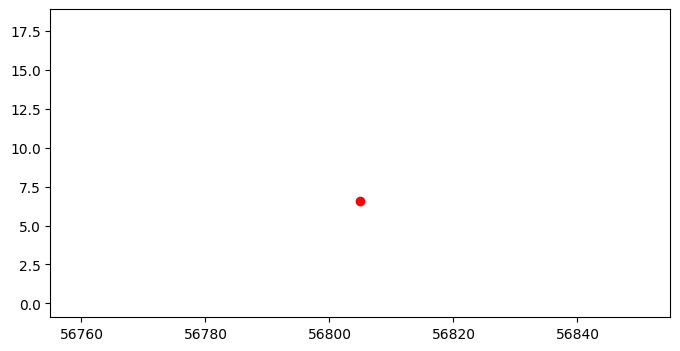

In [ ]:
# convert seconds to 'HH:MM' format
def convert_seconds_to_HHMM(seconds):
    seconds = int(seconds)
    return f"{seconds//3600:02d}:{(seconds%3600)//60:02d}"

# Custom x-axis ticker
def custom_x_ticks(x, pos):
    if  x % 1800 == 0:
        return convert_seconds_to_HHMM(x)
    else:
        return ''

# Initialize the 'data' DataFrame
data = pd.DataFrame(columns=['time', 'entire_num_MA_Smooth'])
data['time'] = df['time'][:len(train)]
data['entire_num_MA_Smooth'] = df['entire_num_MA_Smooth'][:len(train)]

# Initialize the 'real_data' DataFrame
real_data = pd.DataFrame(columns=['time', 'entire_num_MA_Smooth'])

# 그래프 생성
fig, ax = plt.subplots()
line1, = ax.plot(data['time'], data['entire_num_MA_Smooth'], color='blue')
line2, = ax.plot(real_data['time'], real_data['entire_num_MA_Smooth'], color='blue')

# Scatter plot를 저장하기 위한 빈 리스트
scatter_plots = []

# 업데이트 함수: 이 함수는 정기적으로 호출됩니다.
def update(index):
    global predicted_values, scatter_plots, real_data

    # Use index to get the corresponding predicted value
    new_value = predicted_values[index][0]

    # Get the corresponding time
    new_time = df['time'][len(train) + index] + prediction_time

    # 이전 scatter plot들을 제거
    for scat in scatter_plots:
        scat.remove()
    scatter_plots = []

    # 새로운 데이터를 그래프에 추가하고 scatter plot 리스트에 추가
    scat = ax.scatter(new_time, new_value, color='red')
    scatter_plots.append(scat)

    # 이전 텍스트 레이블 제거
    if hasattr(update, 'text_label'):
      update.text_label.remove()

    # 텍스트 레이블 추가
    update.text_label = ax.text(new_time, new_value, f"{new_value:.2f}", fontsize=9, ha='left', va='bottom')


    # 실제 데이터 추가
    real_time = df['time'][len(train) + index]
    real_value = new_data['entire_num_MA_Smooth'][len(train) + index]
    new_real_data = pd.DataFrame({'time': [real_time], 'entire_num_MA_Smooth': [real_value]})
    real_data = pd.concat([real_data, new_real_data], ignore_index=True)

    # 실제 데이터 라인 업데이트
    line2.set_data(real_data['time'], real_data['entire_num_MA_Smooth'])

    # X-axis 범위 업데이트 (예: new_time를 중심으로 양쪽 5000 단위)
    ax.set_xlim(40000, new_time + 1000)
    ax.relim()
    ax.autoscale_view()

    # Override the default x-axis tick labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(custom_x_ticks))

    # Set x-axis ticks every 1800 seconds (30 minutes)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1800))

    plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))

    return scat, line2,

step_size = 50

# Modify frames argument in FuncAnimation to range from 0 to number of predicted values
ani = animation.FuncAnimation(fig, update, frames=range(0, len(predicted_values), step_size), interval=100, blit=False)

# Saving as an animated GIF
ani.save('animation.gif', writer='imagemagick', fps=10)

HTML(ani.to_jshtml())